# Laboratorio 6 - Analisis de Paquetes de Red

## Nombre: Pedro Arriola
## Carnet: 20188

1. Objetivos
- Aplicar los conocimientos sobre redes de computadoras en el análisis estadístico de tráfico de red, para detectar anomalías en el comportamiento de la red.

2. Preámbulo
- Las herramientas sniffer (pasivas) como Wireshark permiten la captura de tráfico de red para su posterior análisis. Con esta información se puede analizar aspectos de la red como la eficiencia y optimización del rendimiento (cuellos de botella), pero también se pueden detectar anomalías que sugieren un análisis profundo para descartar posibles ataques.

#### 3.1 - Analisis Red Domestica

In [4]:
from scapy.all import sniff, rdpcap

# Función para imprimir información de los paquetes
def imprimir_info_paquete(paquete):
    print("Tipo de variable:", type(paquete))
    print("Longitud del paquete:", len(paquete))
    print("Contenido del paquete:", paquete)

# Capturar 25 paquetes de la red doméstica
paquetes = sniff(count=25)

# Imprimir información del primer paquete
print("Tipo de dato del primer paquete capturado:", type(paquetes[0]))

# Imprimir el contenido de 5 paquetes
print("\nContenido de los primeros 5 paquetes:")
for i in range(5):
    imprimir_info_paquete(paquetes[i])

Tipo de dato del primer paquete capturado: <class 'scapy.layers.l2.Ether'>

Contenido de los primeros 5 paquetes:
Tipo de variable: <class 'scapy.layers.l2.Ether'>
Longitud del paquete: 1466
Contenido del paquete: Ether / IP / TCP 173.194.212.207:https > 192.168.0.6:57283 A / Raw
Tipo de variable: <class 'scapy.layers.l2.Ether'>
Longitud del paquete: 1466
Contenido del paquete: Ether / IP / TCP 173.194.212.207:https > 192.168.0.6:57283 A / Raw
Tipo de variable: <class 'scapy.layers.l2.Ether'>
Longitud del paquete: 1466
Contenido del paquete: Ether / IP / TCP 173.194.212.207:https > 192.168.0.6:57283 PA / Raw
Tipo de variable: <class 'scapy.layers.l2.Ether'>
Longitud del paquete: 1466
Contenido del paquete: Ether / IP / TCP 173.194.212.207:https > 192.168.0.6:57284 A / Raw
Tipo de variable: <class 'scapy.layers.l2.Ether'>
Longitud del paquete: 1466
Contenido del paquete: Ether / IP / TCP 173.194.212.207:https > 192.168.0.6:57284 PA / Raw


#### 3.2 - Analisis Estadistico

In [5]:
# 1. Asignar la informacion del archivo pcap a una variable
paquetes = rdpcap("analisis_paquetes.pcap")

# Iterar sobre los primeros 5 paquetes y mostrar su información
for idx, paquete in enumerate(paquetes[:5], start=1):
    print(f"Paquete {idx}:")
    print(paquete.summary())  # Resumen del paquete
    print(paquete.show())      # Mostrar detalles del paquete
    print("-" * 50)

Paquete 1:
Ether / IP / UDP / DNS Qry "b'google.com.'"  / Raw
###[ Ethernet ]### 
  dst       = 80:37:73:96:9b:db
  src       = 88:e9:fe:6a:92:52
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 961
     id        = 1
     flags     = 
     frag      = 0
     ttl       = 64
     proto     = udp
     chksum    = 0x52e6
     src       = 10.1.10.53
     dst       = 84.54.22.33
     \options   \
###[ UDP ]### 
        sport     = domain
        dport     = domain
        len       = 941
        chksum    = 0xf60e
###[ DNS ]### 
           id        = 12
           qr        = 0
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 0
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcount   = 1
           ancount   = 0
           nscount   = 0
           arcount   = 0
           \qd        \
     

In [6]:
import pandas as pd

# Crear un diccionario para almacenar los datos de los paquetes
datos_paquetes = {"Src Address": [], "Dst Address": [], "Src Port": [], "Dst Port": [], "Protocol": [], "Length": []}

# Iterar sobre los paquetes y extraer la información relevante
for paquete in paquetes:
    if 'IP' in paquete and 'UDP' in paquete:
        datos_paquetes["Src Address"].append(paquete['IP'].src)
        datos_paquetes["Dst Address"].append(paquete['IP'].dst)
        datos_paquetes["Src Port"].append(paquete['UDP'].sport)
        datos_paquetes["Dst Port"].append(paquete['UDP'].dport)
        datos_paquetes["Protocol"].append(paquete['IP'].proto)
        datos_paquetes["Length"].append(paquete['IP'].len)

# Convertir el diccionario en un DataFrame
df = pd.DataFrame(datos_paquetes)

In [7]:
# Mostrar el contenido de las primeras 5 filas del dataset
print("Contenido de las primeras 5 filas del dataset:")
print(df.head())

# Mostrar los valores de las columnas: Src Address, Dst Address, Src Port y Dst Port
print("\nValores de las columnas:")
print(df[["Src Address", "Dst Address", "Src Port", "Dst Port"]])

Contenido de las primeras 5 filas del dataset:
   Src Address  Dst Address  Src Port  Dst Port  Protocol  Length
0   10.1.10.53  84.54.22.33        53        53        17     961
1  84.54.22.33   10.1.10.53        53        53        17      84
2   10.1.10.53  84.54.22.33        53        53        17     975
3  84.54.22.33   10.1.10.53        53        53        17      84
4   10.1.10.53  84.54.22.33        53        53        17    1012

Valores de las columnas:
    Src Address  Dst Address  Src Port  Dst Port
0    10.1.10.53  84.54.22.33        53        53
1   84.54.22.33   10.1.10.53        53        53
2    10.1.10.53  84.54.22.33        53        53
3   84.54.22.33   10.1.10.53        53        53
4    10.1.10.53  84.54.22.33        53        53
..          ...          ...       ...       ...
57  84.54.22.33   10.1.10.53        53        53
58   10.1.10.53  84.54.22.33        53        53
59  84.54.22.33   10.1.10.53        53        53
60   10.1.10.53  84.54.22.33        53   

#### 3.3 - Estadisticas

¿Cuál es la IP origen más frecuente?
- La IP origen más frecuente es: `10.1.10.53`

i. ¿A qué IP destino se comunica con más frecuencia?
- Se comunica con más frecuencia a la IP destino: `10.1.10.53`

ii. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?
- El puerto destino más frecuente es: `53`. El propósito de este puerto es el siguiente:

El puerto 53 se utiliza para el servicio de DNS (Domain Name System). DNS es un protocolo que se utiliza para traducir los nombres de dominio (como "google.com") en direcciones IP que las computadoras puedan entender. Por lo tanto, el tráfico enviado al puerto 53 generalmente está relacionado con consultas y respuestas de DNS, lo que permite a las computadoras comunicarse entre sí utilizando nombres de dominio en lugar de direcciones IP.

iii. ¿Desde qué puertos origen se comunica?
- Se comunica desde los siguientes puertos origen:
    - `53`
    - `15812`
    - `23903`

In [8]:
# a. Mostrar todas las IP origen
print("a. Todas las IP origen")
ips_origen = df["Src Address"].unique()
for ip in ips_origen:
    print("- ", ip)

# b. Mostrar todas las IP destino
print("b. Todas las IP destino")
ips_destino = df["Dst Address"].unique()
for ip in ips_destino:
    print("- ", ip)

# c. ¿Cuál es la IP origen más frecuente?
print("\nc. IP origen más frecuente")
ip_origen_frecuente = df["Src Address"].value_counts().idxmax()
print(ip_origen_frecuente)

# i. ¿A qué IP destino se comunica con más frecuencia?
print("\ni. IP destino más frecuente")
ip_destino_frecuente = df["Dst Address"].value_counts().idxmax()
print(ip_destino_frecuente)

# ii. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?
print("\nii. Puerto destino más frecuente")
puerto_destino_frecuente = df[df["Dst Address"] == ip_destino_frecuente]["Dst Port"].value_counts().idxmax()
print(puerto_destino_frecuente)

# iii. ¿Desde que puertos origen se comunica?
print("\niii. Puertos origen")
puertos_origen = df["Src Port"].unique()
for puerto in puertos_origen:
    print("- ", puerto)

a. Todas las IP origen
-  10.1.10.53
-  84.54.22.33
-  75.75.75.75
b. Todas las IP destino
-  84.54.22.33
-  10.1.10.53
-  75.75.75.75

c. IP origen más frecuente
10.1.10.53

i. IP destino más frecuente
10.1.10.53

ii. Puerto destino más frecuente
53

iii. Puertos origen
-  53
-  15812
-  23903


#### 3.4 - Graficas

Basándonos en las estadísticas y gráficas generadas:

- Ambas direcciones IP de origen son igualmente frecuentes, indicando una comunicación activa.
- La dirección IP más frecuente se comunica regularmente con la contraparte, reflejando una comunicación bilateral.
- El puerto 53 es el más utilizado, típico para el protocolo DNS, sugiriendo una actividad significativa de resolución de nombres de dominio.
- Se observa comunicación activa tanto desde como hacia el puerto 53, reflejando un intercambio regular de consultas y respuestas de DNS.
- En resumen, el comportamiento refleja un uso típico del protocolo DNS para la resolución de nombres de dominio, con una distribución uniforme de direcciones IP y prominencia del puerto 53.

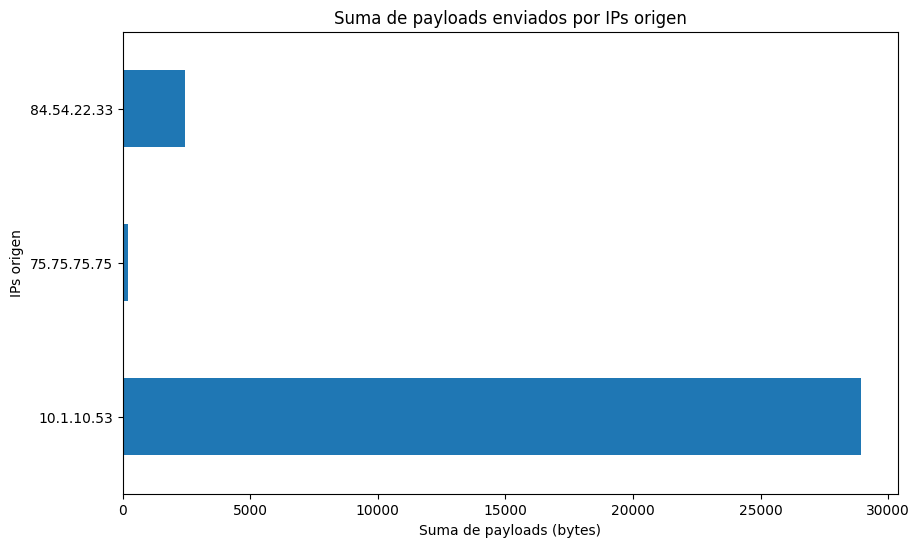

In [9]:
import matplotlib.pyplot as plt

# a. Gráfica de barras 2D horizontales para IPs origen vs. suma de payloads (bytes) enviados
plt.figure(figsize=(10, 6))
df.groupby("Src Address")["Length"].sum().plot(kind="barh")
plt.xlabel("Suma de payloads (bytes)")
plt.ylabel("IPs origen")
plt.title("Suma de payloads enviados por IPs origen")
plt.show()

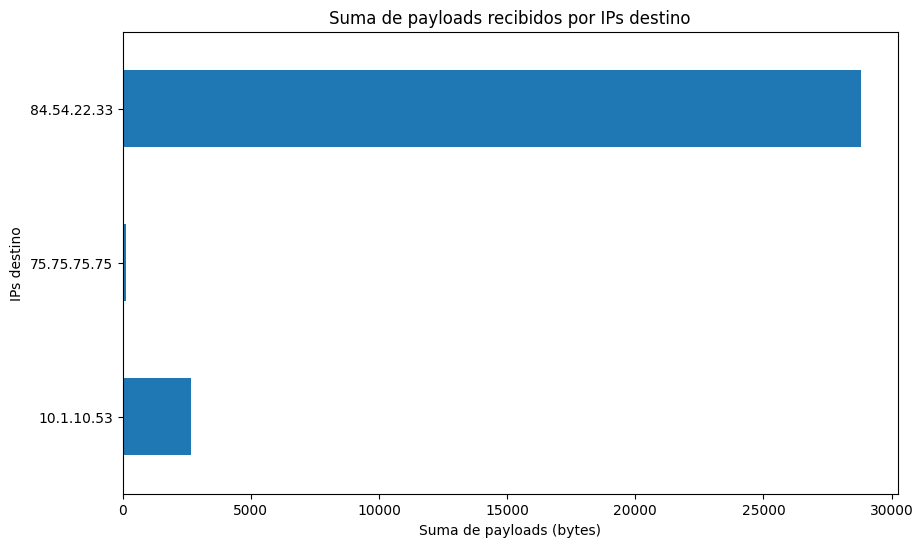

In [10]:
# b. Gráfica de barras 2D horizontales para IPs destino vs. suma de payloads (bytes) recibidos
plt.figure(figsize=(10, 6))
df.groupby("Dst Address")["Length"].sum().plot(kind="barh")
plt.xlabel("Suma de payloads (bytes)")
plt.ylabel("IPs destino")
plt.title("Suma de payloads recibidos por IPs destino")
plt.show()

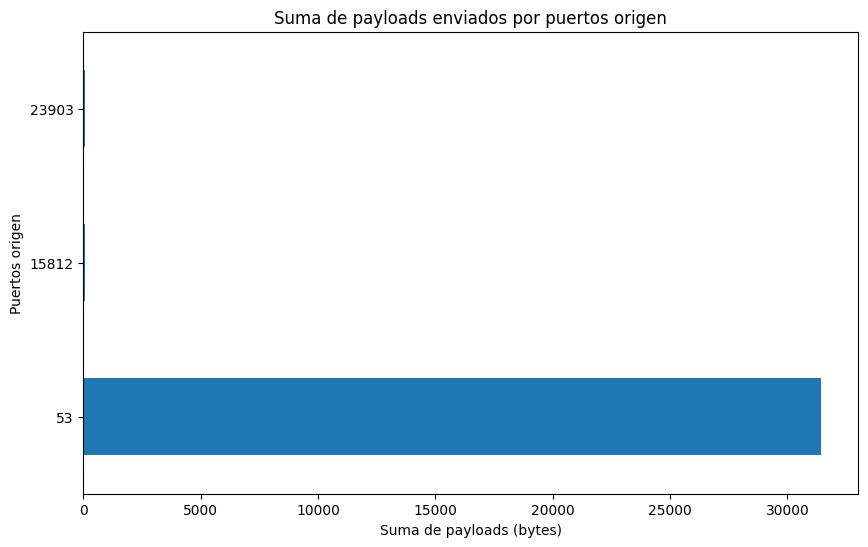

In [11]:
# c. Gráfica de barras 2D horizontales para puertos origen vs. suma de payloads (bytes) enviados
plt.figure(figsize=(10, 6))
df.groupby("Src Port")["Length"].sum().plot(kind="barh")
plt.xlabel("Suma de payloads (bytes)")
plt.ylabel("Puertos origen")
plt.title("Suma de payloads enviados por puertos origen")
plt.show()

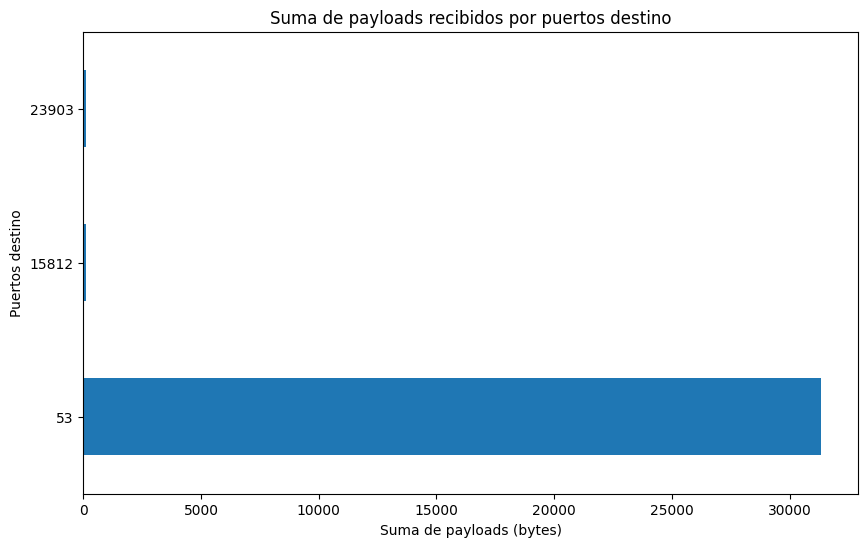

In [12]:
# d. Gráfica de barras 2D horizontales para puertos destino vs. suma de payloads (bytes) recibidos
plt.figure(figsize=(10, 6))
df.groupby("Dst Port")["Length"].sum().plot(kind="barh")
plt.xlabel("Suma de payloads (bytes)")
plt.ylabel("Puertos destino")
plt.title("Suma de payloads recibidos por puertos destino")
plt.show()

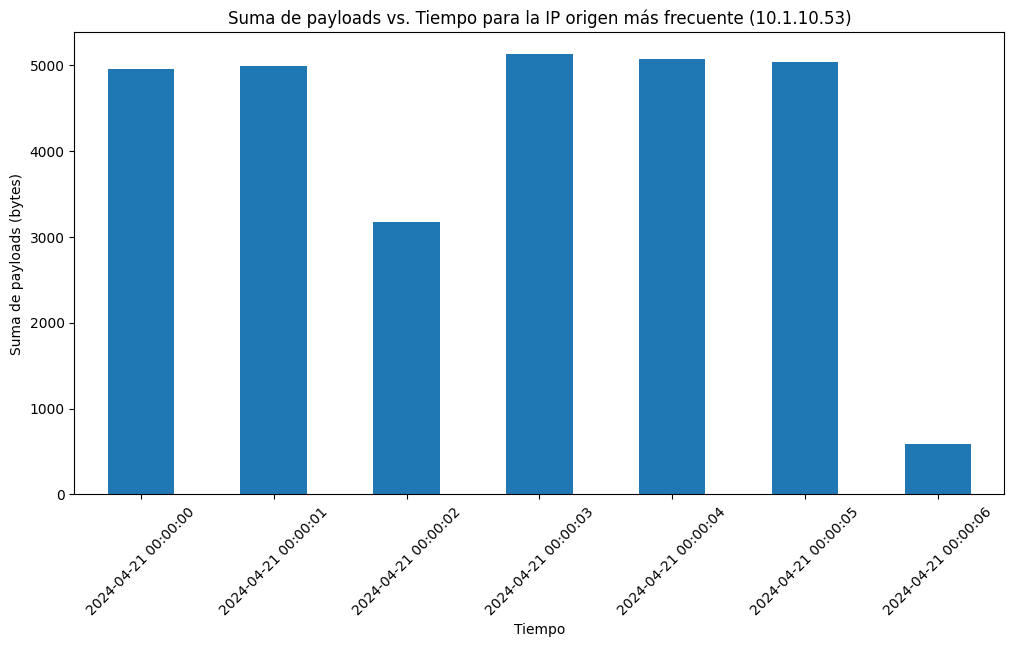

In [22]:
# Crear una columna de tiempo simulada
# Supongamos que hay un paquete capturado cada 0.1 segundos
tiempo_simulado = pd.date_range(start='2024-04-21 00:00:00', periods=len(df), freq='100ms')
df['Tiempo'] = tiempo_simulado

# Filtrar los datos para obtener solo los paquetes de la IP origen más frecuente
df_ip_origen_frecuente = df[df["Src Address"] == ip_origen_frecuente]

# Agrupar los datos por intervalos de tiempo y sumar los payloads para cada intervalo
payloads_por_tiempo = df_ip_origen_frecuente.groupby(pd.Grouper(key='Tiempo', freq='1s'))["Length"].sum()

# Graficar la suma de payloads en función del tiempo
plt.figure(figsize=(12, 6))
payloads_por_tiempo.plot(kind="bar")
plt.xlabel("Tiempo")
plt.ylabel("Suma de payloads (bytes)")
plt.title(f"Suma de payloads vs. Tiempo para la IP origen más frecuente ({ip_origen_frecuente})")
plt.xticks(rotation=45)
plt.show()

#### 3.5 - Investigacion del Payload

Al observar los primeros bytes del contenido, se puede notar que hay un valor inusualmente bajo de 588 bytes en el último elemento del array. Esto puede ser un indicio de que hubo un paquete anómalo o incompleto que se envió al puerto destino. Normalmente, los paquetes de datos enviados a un puerto destino específico deberían tener un tamaño coherente y relevante para el protocolo o la aplicación que está siendo utilizada. Un tamaño de paquete tan bajo como 588 bytes puede indicar algún problema en la transmisión de datos o incluso un intento de ataque, como un intento de inyección de datos o un intento de explotar una vulnerabilidad en el puerto destino.

In [17]:
# Filtrar el DataFrame original para obtener solo las conexiones con la dirección IP origen más frecuente
df_ip_origen_frecuente = df[df["Src Address"] == ip_origen_frecuente]

df_ip_origen_frecuente

,Src Address,Dst Address,Src Port,Dst Port,Protocol,Length,Tiempo
0,10.1.10.53,84.54.22.33,53,53,17,961,2024-04-21 00:00:00.000
2,10.1.10.53,84.54.22.33,53,53,17,975,2024-04-21 00:00:00.200
4,10.1.10.53,84.54.22.33,53,53,17,1012,2024-04-21 00:00:00.400
6,10.1.10.53,84.54.22.33,53,53,17,998,2024-04-21 00:00:00.600
8,10.1.10.53,84.54.22.33,53,53,17,1003,2024-04-21 00:00:00.800
10,10.1.10.53,84.54.22.33,53,53,17,1045,2024-04-21 00:00:01.000
12,10.1.10.53,84.54.22.33,53,53,17,1008,2024-04-21 00:00:01.200
14,10.1.10.53,84.54.22.33,53,53,17,979,2024-04-21 00:00:01.400
16,10.1.10.53,84.54.22.33,53,53,17,959,2024-04-21 00:00:01.600
18,10.1.10.53,84.54.22.33,53,53,17,992,2024-04-21 00:00:01.800


In [18]:
# Agrupar el DataFrame por dirección IP destino y sumar los payloads
df_agrupado = df_ip_origen_frecuente.groupby("Dst Address")["Length"].sum().reset_index()

df_agrupado

,Dst Address,Length
0,75.75.75.75,130
1,84.54.22.33,28791


In [19]:
# Obtener la dirección IP destino con la suma más alta de payloads
ip_sospechosa = df_agrupado.loc[df_agrupado["Length"].idxmax()]["Dst Address"]

ip_sospechosa

'84.54.22.33'

In [20]:
# Filtrar el DataFrame original para obtener la conversación entre las dos direcciones IP
df_conversacion = df[(df["Src Address"] == ip_origen_frecuente) & (df["Dst Address"] == ip_sospechosa)]

df_conversacion

,Src Address,Dst Address,Src Port,Dst Port,Protocol,Length,Tiempo
0,10.1.10.53,84.54.22.33,53,53,17,961,2024-04-21 00:00:00.000
2,10.1.10.53,84.54.22.33,53,53,17,975,2024-04-21 00:00:00.200
4,10.1.10.53,84.54.22.33,53,53,17,1012,2024-04-21 00:00:00.400
6,10.1.10.53,84.54.22.33,53,53,17,998,2024-04-21 00:00:00.600
8,10.1.10.53,84.54.22.33,53,53,17,1003,2024-04-21 00:00:00.800
10,10.1.10.53,84.54.22.33,53,53,17,1045,2024-04-21 00:00:01.000
12,10.1.10.53,84.54.22.33,53,53,17,1008,2024-04-21 00:00:01.200
14,10.1.10.53,84.54.22.33,53,53,17,979,2024-04-21 00:00:01.400
16,10.1.10.53,84.54.22.33,53,53,17,959,2024-04-21 00:00:01.600
18,10.1.10.53,84.54.22.33,53,53,17,992,2024-04-21 00:00:01.800


In [21]:
# Obtener los payloads y añadirlos en un array
payloads_array = df_conversacion["Length"].values

payloads_array

array([ 961,  975, 1012,  998, 1003, 1045, 1008,  979,  959,  992, 1051,
       1006,  986, 1004, 1037, 1004, 1039, 1037, 1035, 1010, 1006, 1006,
       1013, 1019, 1005, 1017, 1027,  969,  588])